In [ ]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import tensorflow
from sklearn.model_selection import train_test_split
# from torch import jit
# Used for one hot encoding.
from keras.utils import to_categorical

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Splitted in train and test samples.
print("This is for the X-train  ", X_train.shape)
print("This is for the X-test : ", X_test.shape)
print("This is for the y-train  ", y_train.shape)
print("This is for the y-test : ", y_test.shape)

This is for the X-train   (60000, 28, 28)
This is for the X-test :  (10000, 28, 28)
This is for the y-train   (60000,)
This is for the y-test :  (10000,)


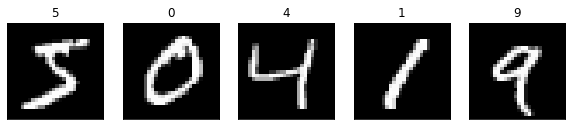

In [ ]:
# Display some images
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
  # Displaying the title.
    axes[i].set_title(y_train[i])
    # To display the title.
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Convert y_train into one-hot format 
temp = []
for i in range(len(y_train)):
  temp.append(to_categorical(y_train[i], num_classes=10))    
y_train = np.array(temp)

# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):
  temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

# Check the new shapr of train and test data set.
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Sequential
# Create simple Neural Network model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
# We can also use the code below in order to see the details of our architecture:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 10)                7850      
                                                                 
 dense_24 (Dense)            (None, 10)                110       
                                                                 
 dense_25 (Dense)            (None, 10)                110       
                                                                 
 dense_26 (Dense)            (None, 10)                110       
                                                                 
 dense_27 (Dense)            (None, 10)                110       
                                                                 
 dense_28 (Dense)            (None, 10)               

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['acc'])
# Train the Neural Network model
model.fit(X_train, y_train, epochs=15, validation_data=(X_test,y_test))

Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 2.0265 - acc: 0.2175 - val_loss: 1.7478 - val_acc: 0.2938
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6792 - acc: 0.3190 - val_loss: 1.5706 - val_acc: 0.3505
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5408 - acc: 0.3826 - val_loss: 1.4623 - val_acc: 0.4484
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4550 - acc: 0.4500 - val_loss: 1.3999 - val_acc: 0.4613
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3866 - acc: 0.4707 - val_loss: 1.3318 - val_acc: 0.4928
Epoch 6/15
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3295 - acc: 0.4990 - val_loss: 1.2904 - val_acc: 0.5552
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2592 - acc: 0.5300 - val_loss: 1.1937 - val_acc: 0.5522
Epoch 8/15
1875/1875 [==============================] - 6s 3ms

313/313 [==============================] - 1s 1ms/step


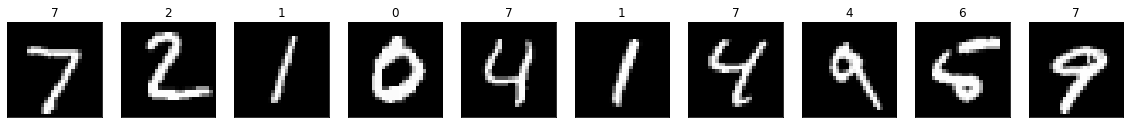

In [ ]:
# Making predictions using our trained model
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

# Display some predictions on test data
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))
for i in range(10):
  axes[i].set_title(predictions[i])
  axes[i].imshow(X_test[i], cmap='gray')
  axes[i].get_xaxis().set_visible(False)
  axes[i].get_yaxis().set_visible(False)

plt.show()